<a href="https://colab.research.google.com/github/CrabRave4204/KSU-IE/blob/main/SQC_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
   from google.colab import drive

   drive.mount('/content/drive')

   import pandas as pd

   P1Data = pd.read_csv('/content/drive/MyDrive/BUSHING DIAMETER 2 BATCHES (1).csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
P1Data

,Batch 1,Batch 2
0,1.001,1.000
1,1.005,1.005
2,1.015,1.015
3,1.020,1.005
4,1.010,0.990
5,1.015,1.005
6,1.000,1.015
7,1.010,1.000
8,0.999,1.005
9,1.010,0.990


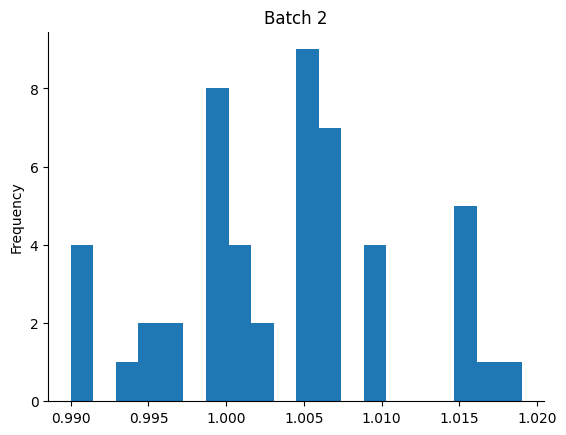

In [16]:
# @title Batch 2

from matplotlib import pyplot as plt
P1Data['Batch 2'].plot(kind='hist', bins=20, title='Batch 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

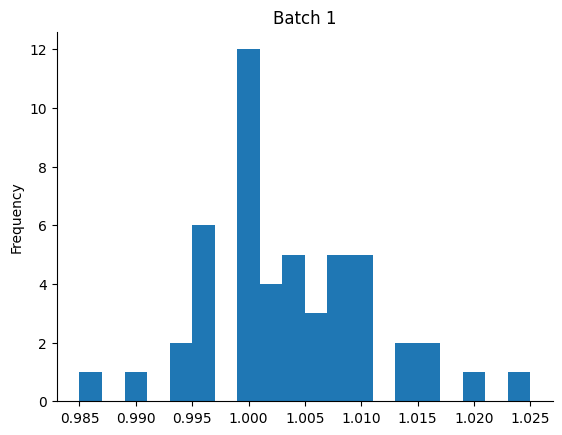

In [15]:
# @title Batch 1

P1Data['Batch 1'].plot(kind='hist', bins=20, title='Batch 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

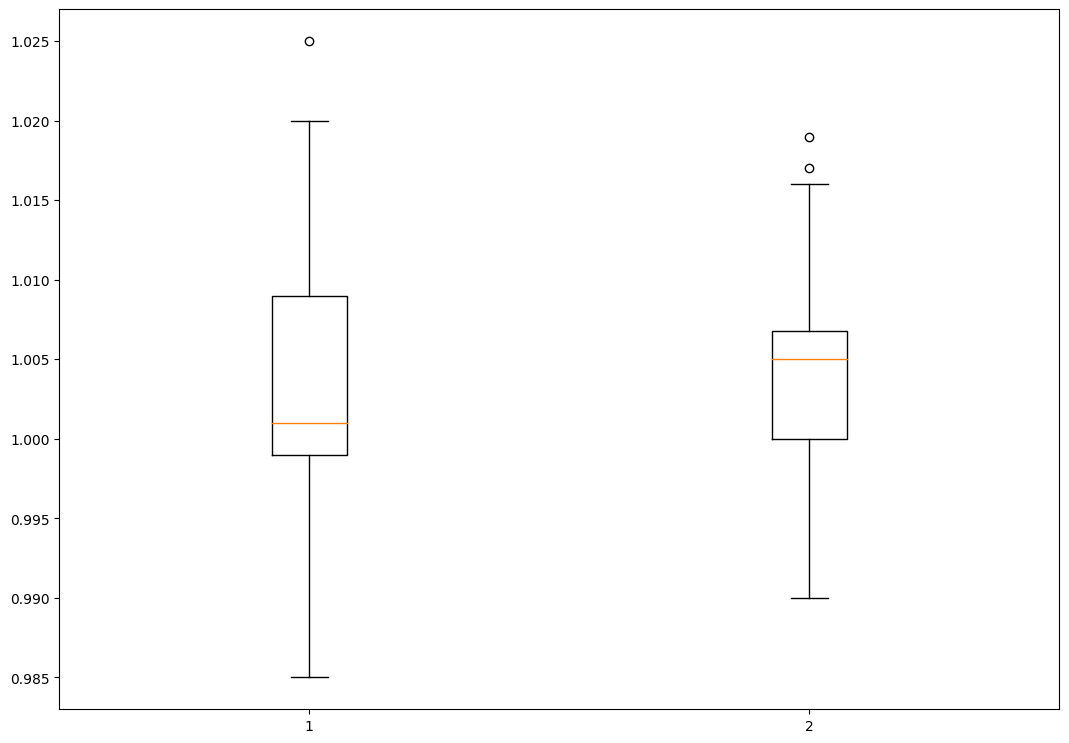

In [18]:
import numpy as np

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

P1DataCombo = [P1Data['Batch 1'], P1Data['Batch 2']]

bp = ax.boxplot(P1DataCombo)

plt.show()

In [22]:
# prompt: basic statistics for Batch1 and Batch2 side by side

import pandas as pd
# Calculate basic statistics for Batch 1 and Batch 2
batch1_stats = P1Data['Batch 1'].describe()
batch2_stats = P1Data['Batch 2'].describe()

# Create a DataFrame to display the statistics side by side
stats_df = pd.DataFrame({'Batch 1': batch1_stats, 'Batch 2': batch2_stats})

# Display the DataFrame
print(stats_df)


         Batch 1    Batch 2
count  50.000000  50.000000
mean    1.003360   1.003660
std     0.007714   0.007227
min     0.985000   0.990000
25%     0.999000   1.000000
50%     1.001000   1.005000
75%     1.009000   1.006750
max     1.025000   1.019000


In [20]:
# prompt: levenes test on Batch 1 and 2

from scipy import stats

# Perform Levene's test
stat, p = stats.levene(P1Data['Batch 1'], P1Data['Batch 2'])

print("Levene's test statistic:", stat)
print("p-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p > alpha:
    print("Variances are equal (fail to reject null hypothesis)")
else:
    print("Variances are not equal (reject null hypothesis)")


Levene's test statistic: 0.17382447925589828
p-value: 0.6776468456806726
Variances are equal (fail to reject null hypothesis)


In [21]:
# prompt: t test for batch 1 and 2

# Perform t-test
t_stat, p_value = stats.ttest_ind(P1Data['Batch 1'], P1Data['Batch 2'])

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("No significant difference between the means (fail to reject null hypothesis)")
else:
    print("Significant difference between the means (reject null hypothesis)")


T-statistic: -0.20069320812014202
P-value: 0.8413543932394967
No significant difference between the means (fail to reject null hypothesis)


In [23]:
# prompt: test batch 1 to see if it is significantly skewed to the left

from scipy.stats import skew

# Calculate the skewness of Batch 1
skewness = skew(P1Data['Batch 1'])

print("Skewness of Batch 1:", skewness)

# Test for left skew (negative skewness)
alpha = 0.05  # Significance level
if skewness < 0:
  print("Batch 1 is skewed to the left.")
else:
  print("Batch 1 is not significantly skewed to the left.")


Skewness of Batch 1: 0.37132661288858954
Batch 1 is not significantly skewed to the left.
